In [5]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import re
import joblib
import matplotlib.pyplot as plt

In [6]:
#Loading the data
from google.colab import files
uploaded = files.upload()

Saving Phishing_URL_Dataset.csv to Phishing_URL_Dataset.csv


In [7]:
#Reading the uploaded file
df = pd.read_csv('Phishing_URL_Dataset.csv', encoding='latin-1', on_bad_lines='skip')

Obtained from; https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset.


PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.

In [8]:
df.head()

,ï»¿FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [9]:
df.sample(20)

,ï»¿FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
2399,602831.txt,https://www.mallorca-momente.com,31,www.mallorca-momente.com,24,0,com,100.000000,0.562500,0.522907,...,0,0,1,22,2,24,107,0,115,1
52774,oph12223.txt,https://att-102605-100775.weeblysite.com/,41,att-102605-100775.weeblysite.com,32,0,com,36.612216,0.607143,0.522907,...,1,0,0,19,3,9,1,0,4,0
67222,8012317.txt,https://purchase-winted.564566676.xyz/tdpq3mhh...,60,purchase-winted.564566676.xyz,29,0,xyz,21.772078,0.720000,0.001750,...,0,0,0,0,0,0,0,0,0,0
39319,447781.txt,https://www.precast.com,22,www.precast.com,15,0,com,100.000000,1.000000,0.522907,...,0,0,1,22,7,17,26,2,9,1
113030,591602.txt,https://www.therightshoe.ca,26,www.therightshoe.ca,19,0,ca,100.000000,1.000000,0.010183,...,0,0,1,89,3,9,174,8,13,1
11697,840887.txt,https://www.thepitcrewonline.net,31,www.thepitcrewonline.net,24,0,net,100.000000,1.000000,0.038420,...,0,0,1,78,46,52,171,0,187,1
176841,526612.txt,https://www.wicc600.com,22,www.wicc600.com,15,0,com,100.000000,1.000000,0.522907,...,0,0,1,38,25,46,103,4,140,1
40695,462743.txt,https://www.genesismud.org,25,www.genesismud.org,18,0,org,100.000000,1.000000,0.079963,...,0,0,1,7,2,1,6,0,15,1
68979,mw144378.txt,http://www.gorajautomation.com,30,www.gorajautomation.com,23,0,com,78.282548,1.000000,0.522907,...,0,0,1,4,1,2,1,0,4,0
133676,704143.txt,https://www.iganga.go.ug,23,www.iganga.go.ug,16,0,ug,100.000000,0.777778,0.000071,...,0,0,1,8,4,8,66,2,7,1


In [10]:
df.shape

(235795, 56)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ï»¿FILENAME                 235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [12]:
df.columns

Index(['ï»¿FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength',
       'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'N

**Data Cleaning**

In [13]:
#If columns are not strings, convert them
df.columns = df.columns.str.replace(r'ï»¿', '', regex=True)


In [14]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [15]:
print(df.columns.tolist())

['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [17]:
#Striping spaces
df.columns = df.columns.str.strip()

In [18]:
print(df.columns)

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [22]:
# 1. Remove non-numeric irrelevant columns that can't be used for model training
df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title'], inplace=True)


In [23]:
print(df.columns)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

Irrelevant Columns: Removed columns such as FILENAME, URL, Domain, and Title, which are not useful for classification.

In [25]:
# For simplicity, we'll drop rows with missing values. Alternatively, you can fill missing values with mean, median, or mode.
df_cleaned = df.dropna()  # Remove rows with missing values #Assign df to df_cleaned

In [26]:
# 2. Check for and remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

Duplicates: Duplicates were identified and removed, ensuring that each observation in the dataset is unique. This avoids any bias in model training caused by repeated data.

In [27]:
# 3. Check for missing values
missing_values = df_cleaned.isnull().sum()

In [28]:
# 5. Ensure proper data types
df_cleaned.dtypes

,0
URLLength,int64
DomainLength,int64
IsDomainIP,int64
TLD,object
URLSimilarityIndex,float64
CharContinuationRate,float64
TLDLegitimateProb,float64
URLCharProb,float64
TLDLength,int64
NoOfSubDomain,int64


Data Types: Ensured that all columns have the correct data type (integers for numerical features, etc.).

In [29]:
# Display the cleaned dataframe and missing values
df_cleaned.head(), missing_values

(   URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
 0         31            24           0  com               100.0   
 1         23            16           0   de               100.0   
 2         29            22           0   uk               100.0   
 3         26            19           0  com               100.0   
 4         33            26           0  org               100.0   
 
    CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
 0              1.000000           0.522907     0.061933          3   
 1              0.666667           0.032650     0.050207          2   
 2              0.866667           0.028555     0.064129          2   
 3              1.000000           0.522907     0.057606          3   
 4              1.000000           0.079963     0.059441          3   
 
    NoOfSubDomain  ...  Pay  Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  \
 0              1  ...    0       0                 1         34       20   
 1      

Missing Values: The dataset was checked for missing values, and since there were no missing entries, we moved forward with no imputation or removal of rows due to missing values.

In [30]:
df['label']

,label
0,1
1,1
2,1
3,1
4,1
...,...
235790,1
235791,1
235792,1
235793,0


In [31]:
df.sample(10)

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
68221,29,22,0,com,100.000000,1.000000,0.522907,0.066785,3,1,...,0,0,1,34,5,16,107,0,112,1
232588,30,23,0,org,100.000000,1.000000,0.079963,0.062834,3,1,...,0,0,1,4,26,17,57,0,1,1
233452,21,14,0,it,100.000000,1.000000,0.012178,0.063353,2,1,...,0,0,1,27,21,21,162,1,169,1
182031,20,13,0,fr,100.000000,1.000000,0.014148,0.047294,2,1,...,0,0,1,63,6,34,39,0,43,1
195802,22,15,0,com,100.000000,1.000000,0.522907,0.056656,3,1,...,0,0,1,9,4,13,15,5,14,1
85046,51,42,0,com,51.901071,0.710526,0.522907,0.065188,3,1,...,0,0,0,0,0,0,0,0,0,0
96490,41,32,0,com,56.657484,0.607143,0.522907,0.058795,3,1,...,0,0,0,0,0,0,0,0,2,0
212639,22,16,0,com,74.380165,1.000000,0.522907,0.061079,3,1,...,0,0,0,0,0,0,0,0,0,0
61701,40,33,0,com,100.000000,1.000000,0.522907,0.057899,3,1,...,1,0,1,56,9,12,243,26,7,1
161491,67,7,0,io,13.905966,1.000000,0.012927,0.031402,2,0,...,0,0,0,0,0,0,0,0,0,0


**Exploratory Data Analysis (EDA)** *Explore key features and relationships.*

Target Distribution: The label column, which classifies URLs as phishing (1) or legitimate (0), shows an imbalanced distribution. Phishing URLs (labeled 1) dominate the dataset. This class imbalance might affect model performance, requiring techniques like oversampling or adjusting class weights to improve performance for the minority class (legitimate URLs).

<ipython-input-32-6e6e8ba3b04a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_cleaned, palette='Set2')


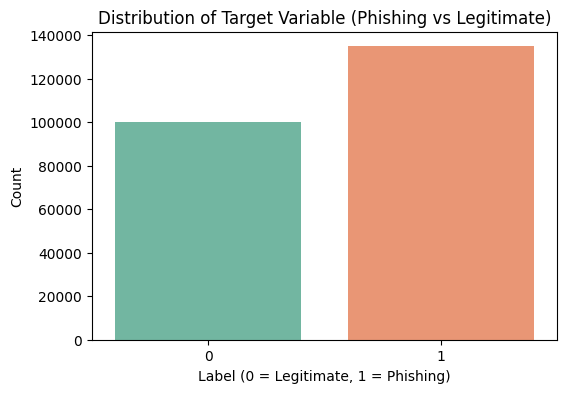

In [32]:
# Distribution of the target variable:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_cleaned, palette='Set2')
plt.title('Distribution of Target Variable (Phishing vs Legitimate)')
plt.xlabel('Label (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.show()

Correlation Heatmap: The correlation heatmap revealed several strong correlations between numerical features, particularly features related to URL length and domain characteristics. This suggests that certain features may provide redundant information, and careful feature selection could help streamline the model and reduce overfitting.

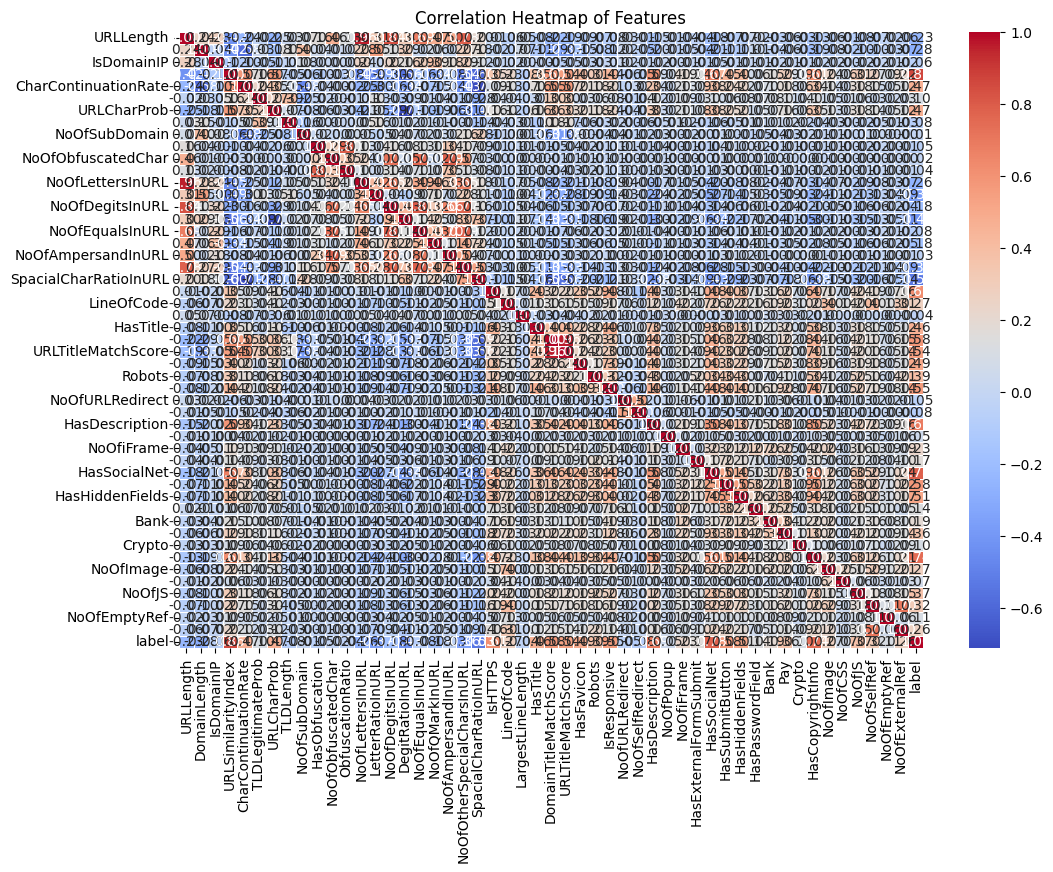

In [33]:
# Compute the correlation matrix
# Select only numeric columns before calculating correlation
correlation_matrix = df_cleaned.select_dtypes(include=np.number).corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Feature Distribution: URLLength and DomainLength: These features exhibited different ranges across phishing and legitimate URLs, which could be useful in distinguishing between the two classes. Longer URLs and domain names may be indicative of phishing attempts.

NoOfImage, NoOfCSS, NoOfJS: The presence of images, CSS, and JavaScript files showed variability across phishing and legitimate URLs, indicating that phishing websites may use more complex designs, which is a common strategy to appear legitimate.


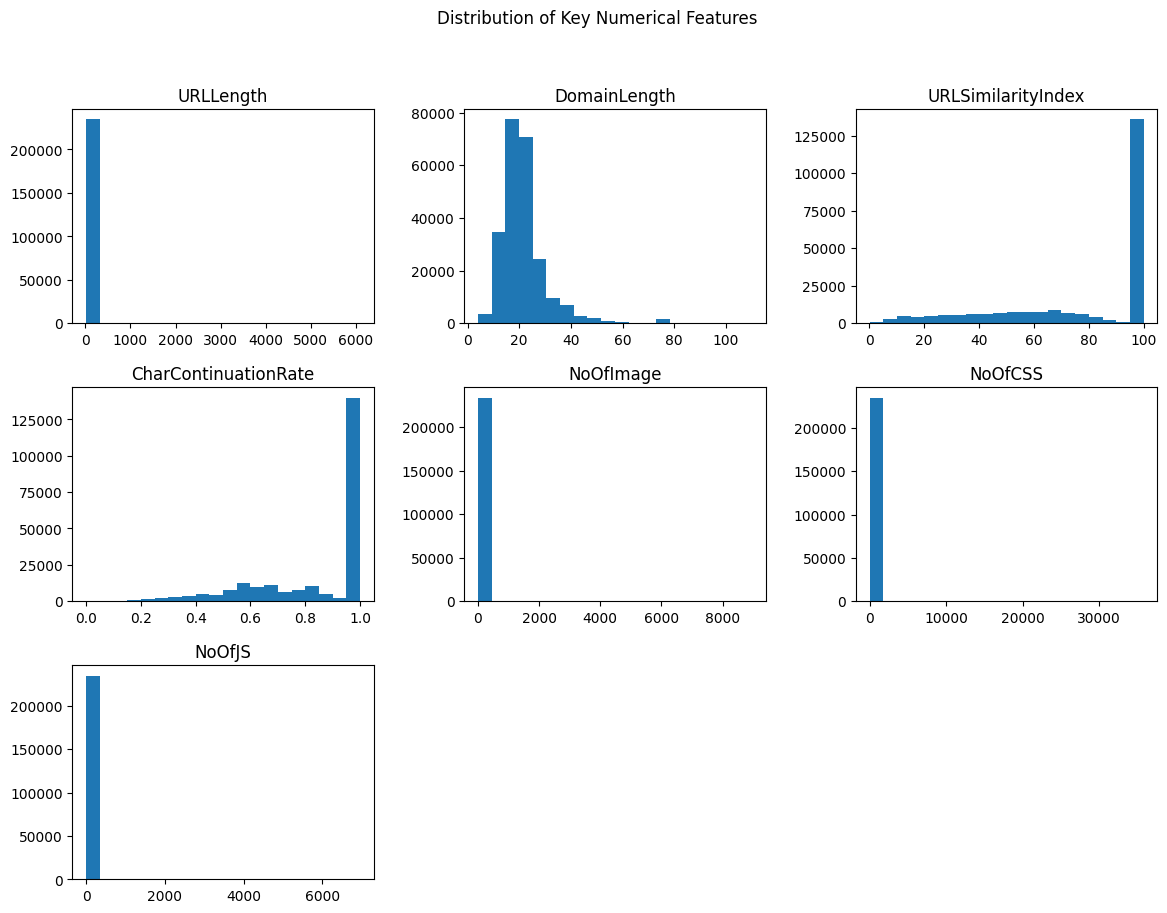

In [34]:
#Distribution of key numerical features
key_features = ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 'NoOfImage', 'NoOfCSS', 'NoOfJS']
df_cleaned[key_features].hist(bins=20, figsize=(14, 10), grid=False)
plt.suptitle('Distribution of Key Numerical Features')
plt.show()

Feature vs Target Visualization: Boxplots for URLLength and DomainLength: These plots show that phishing URLs tend to have longer URL lengths and domain names than legitimate ones. This could suggest that phishing websites often use more complex URLs to confuse users.

Boxplot for NoOfImage: The number of images appears to vary between phishing and legitimate URLs, with phishing sites using more images. This aligns with common strategies used in phishing sites to mimic real websites.

<ipython-input-35-0aede6df14f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='URLLength', data=df_cleaned, palette='Set2')


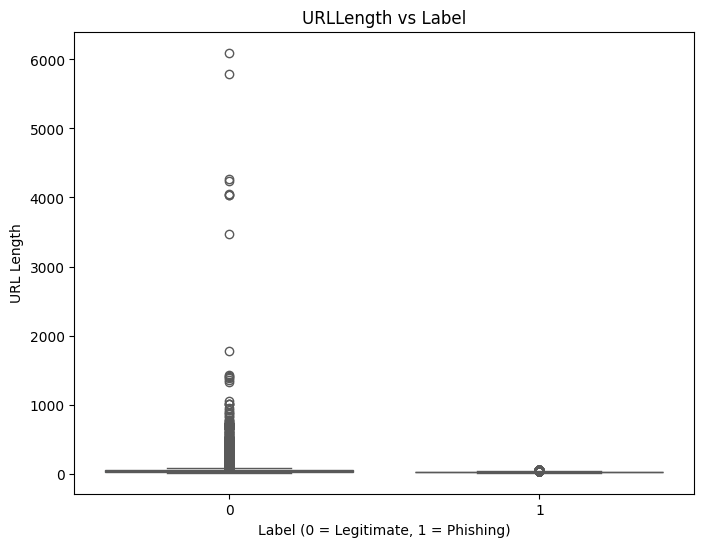

In [35]:
# Visualizing relationships between features and the target variable (label)
# Visualizing 'URLLength' vs 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='URLLength', data=df_cleaned, palette='Set2')
plt.title('URLLength vs Label')
plt.xlabel('Label (0 = Legitimate, 1 = Phishing)')
plt.ylabel('URL Length')
plt.show()


<ipython-input-36-1afb258e9acd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='DomainLength', data=df_cleaned, palette='Set2')


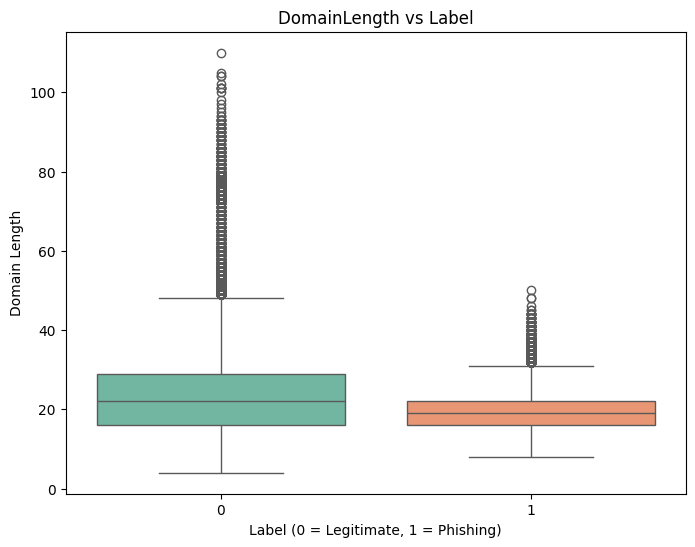

In [36]:
# Visualizing 'DomainLength' vs 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='DomainLength', data=df_cleaned, palette='Set2')
plt.title('DomainLength vs Label')
plt.xlabel('Label (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Domain Length')
plt.show()

<ipython-input-37-f4bb8e8c2b18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='NoOfImage', data=df_cleaned, palette='Set2')


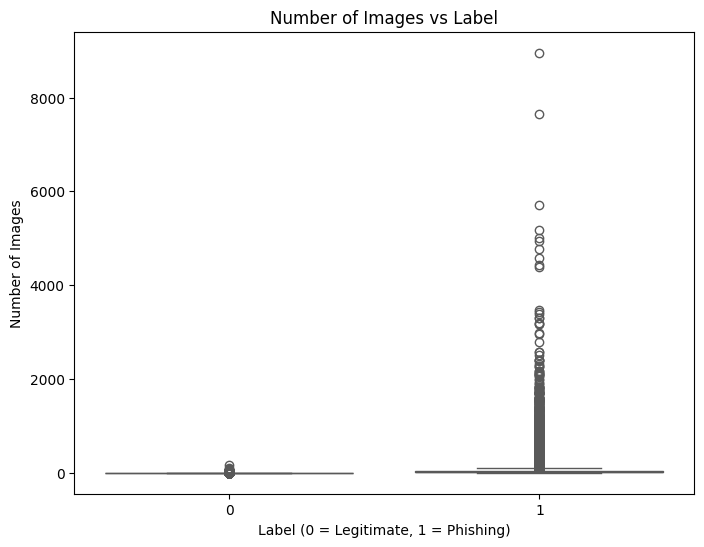

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='NoOfImage', data=df_cleaned, palette='Set2')
plt.title('Number of Images vs Label')
plt.xlabel('Label (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Number of Images')
plt.show()

**Data Preprocessing**

Data preprocessing is a crucial step before model training. It includes tasks such as handling categorical features, scaling numerical data, dealing with class imbalance, splitting the dataset into training and testing sets, and more. Here's how we'll proceed with preprocessing:


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [39]:
scaler = StandardScaler()

In [40]:

# In this dataset, we already removed non-numeric columns, so no categorical encoding is needed.
# Based on EDA, we can keep all the numerical features for now, but we could remove highly correlated features if needed.
# We'll continue using the cleaned dataset from the previous steps.
# Identify numeric columns (we only have numerical columns remaining after cleaning)
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Standardize the numerical features

In [41]:
# Standardize the numerical features
X = df_cleaned[numeric_columns]
y = df_cleaned['label']

X_scaled = scaler.fit_transform(X)


In [42]:
# 4. Addressing Class Imbalance
# We will use random oversampling to balance the classes.
# First, concatenate the features and target for easy manipulation
df_balanced = pd.concat([pd.DataFrame(X_scaled), y], axis=1)

In [43]:
# Separate the minority and majority classes
df_majority = df_balanced[df_balanced['label'] == 1]
df_minority = df_balanced[df_balanced['label'] == 0]

In [44]:
# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),  # Match the majority class size
                                 random_state=42)  # For reproducibility

In [45]:
# Combine the majority class with the upsampled minority class
df_balanced_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [46]:
# Separate the features and target again after upsampling
X_balanced = df_balanced_upsampled.drop(columns=['label'])
y_balanced = df_balanced_upsampled['label']


In [47]:
# 5. Train-Test Split
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [48]:
# 3. Scaling Numerical Features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test set

In [49]:
 #6. Outlier Handling (if needed)
# We already used z-scores during EDA to handle outliers, so this step has been handled.

# Display the processed data information
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215760, 51), (53940, 51), (215760,), (53940,))

This preprocessing ensures that the data is properly prepared for model training, with balanced classes and standardized features.
Key Steps:
Handling Categorical Data: Since the dataset consists of only numerical features, we don’t need to encode categorical columns. All features are ready for model use.

Feature Selection: We retain all features for now as we found useful information in the features during EDA. Feature engineering can be applied later if necessary.

Scaling Numerical Features: All numerical features are standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1.

Class Imbalance: The dataset has an imbalance, with phishing URLs (1) being more frequent than legitimate URLs (0). To address this, we oversample the minority class (legitimate URLs) using resample to ensure the classes are balanced in the training data.

Train-Test Split: The dataset is split into 80% training data and 20% testing data to evaluate the model effectively.

Outlier Handling: Outliers were previously handled in the EDA step using z-scores, so we don’t need additional handling here.


**Model Training**

Now that the data preprocessing is complete, we can move forward with the model training phase. This step involves choosing the appropriate machine learning model, training it using the prepared dataset, evaluating its performance, and fine-tuning the model as needed. Below are the steps involved in the model training process:

*Random Forest*

For a binary classification task like this one (phishing vs legitimate URLs), we can choose from several algorithms. In this case, we will use a Random Forest Classifier, which is a powerful ensemble learning method based on decision trees. Random Forest is a great choice for handling both classification and regression tasks, as it performs well with imbalanced data, is robust to overfitting, and can handle both numerical and categorical features.

In [50]:
import time

In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



In [53]:
# 1. Train and Evaluate Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train_scaled, y_train)
rfc_y_pred = rfc_model.predict(X_test_scaled)

In [54]:
# 2. Train and Evaluate XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_y_pred = xgb_model.predict(X_test_scaled)

In [55]:
# Assuming X and y are your original data
# 1. Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace with your preferred strategy
X_imputed = imputer.fit_transform(X)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [56]:
# Function to compute metrics and plot confusion matrix
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display metrics
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"{model_name} - Precision: {precision:.2f}")
    print(f"{model_name} - Recall: {recall:.2f}")
    print(f"{model_name} - F1: {f1:.2f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy, precision, recall, f1, conf_matrix


Random Forest - Accuracy: 0.51
Random Forest - Precision: 0.56
Random Forest - Recall: 0.70
Random Forest - F1: 0.62


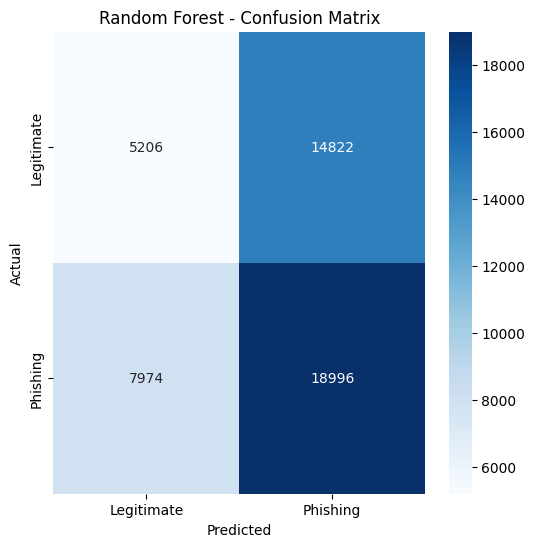

XGBoost - Accuracy: 0.53
XGBoost - Precision: 0.62
XGBoost - Recall: 0.48
XGBoost - F1: 0.54


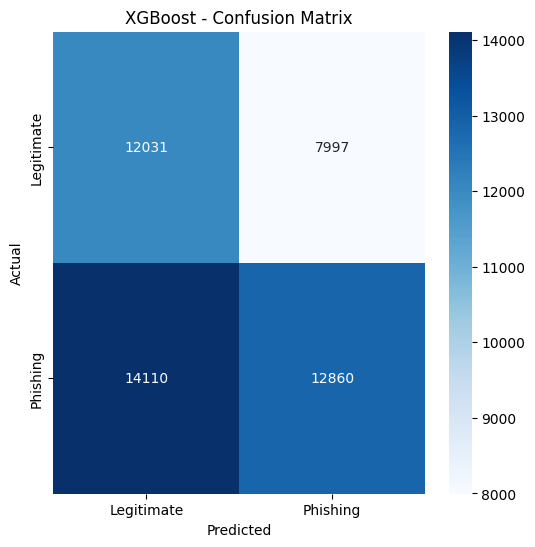

SVM - Accuracy: 1.00
SVM - Precision: 1.00
SVM - Recall: 1.00
SVM - F1: 1.00


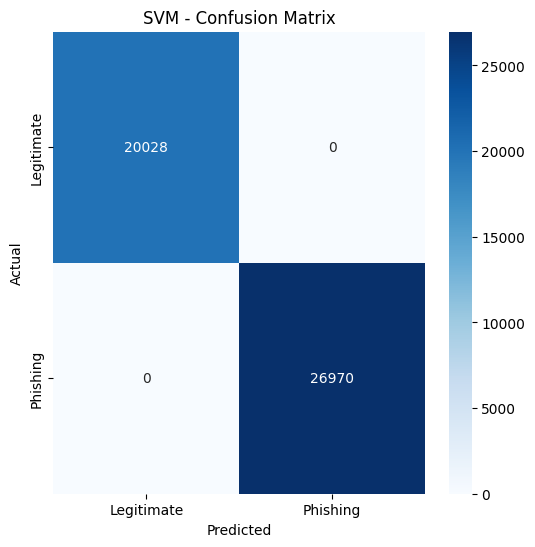

(1.0,
 1.0,
 1.0,
 1.0,
 array([[20028,     0],
        [    0, 26970]]))

In [58]:
 # Evaluate Random Forest Classifier
# Assuming rfc_model, xgb_model, and svm_model are trained
# and X_test_scaled, y_test are from the SVM preprocessing (cell 57)

# Predictions for Random Forest
rfc_y_pred = rfc_model.predict(X_test_scaled)
evaluate_model(y_test, rfc_y_pred, "Random Forest")

# Predictions for XGBoost
xgb_y_pred = xgb_model.predict(X_test_scaled)
evaluate_model(y_test, xgb_y_pred, "XGBoost")

# Predictions for SVM (already done in cell 57)
# ... (no need to predict again)
evaluate_model(y_test, svm_model.predict(X_test_scaled), "SVM")

In [59]:
#Logical Regression
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [60]:

LR_y_pred = LR_model.predict(X_test)


In [61]:
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_precision = precision_score(y_test, LR_y_pred)
LR_recall = recall_score(y_test, LR_y_pred)
LR_f1 = f1_score(y_test, LR_y_pred)

In [62]:
print('Accuracy: {:.2f}'.format(LR_accuracy))
print('Precision: {:.2f}'.format(LR_precision))
print('Recall: {:.2f}'.format(LR_recall))
print('F1: {:.2f}'.format(LR_f1))

Accuracy: 0.43
Precision: 0.50
Recall: 0.47
F1: 0.48


In [63]:

# Ploting ROC curves for all models
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>